# Project Summary:
This dataset provides a comprehensive, time-series overview of the global COVID-19 pandemic, covering 498,511 entries across multiple countries and dates. It includes daily and cumulative data on COVID-19 cases and deaths, as well as key metrics such as case fatality rates, hospitalizations, ICU admissions, and government response measures like the stringency index. The dataset also tracks testing volume, test positivity rates, and a wide range of vaccination indicators—including total doses administered and people fully vaccinated—alongside demographic and socioeconomic factors such as population size, median age, GDP per capita, and health infrastructure metrics. This rich dataset supports in-depth analysis of pandemic trends, policy effectiveness, and health outcomes across different regions.
# Dataset Overview
- Total Rows (Observations): 498,511
- Total Columns (Features): 61
- Global COVID-19 data across multiple countries and dates

In [40]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [41]:
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"

In [42]:
data = pd.read_csv(url)
data.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498511 entries, 0 to 498510
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     498511 non-null  object 
 1   date                                        498511 non-null  object 
 2   total_cases                                 483309 non-null  float64
 3   new_cases                                   480550 non-null  float64
 4   new_cases_smoothed                          479334 non-null  float64
 5   total_cases_per_million                     483309 non-null  float64
 6   new_cases_per_million                       480550 non-null  float64
 7   new_cases_smoothed_per_million              479334 non-null  float64
 8   total_deaths                                483309 non-null  float64
 9   new_deaths                                  481297 non-null  float64
 

# 1. Cleaning the data 

In [44]:
# checking how much data is missing in each column:
missing_percent = (data.isna().sum() / len(data)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

life_expectancy                               100.000000
weekly_icu_admissions_per_million              97.794833
weekly_icu_admissions                          97.794833
excess_mortality_cumulative_per_million        97.271474
excess_mortality_cumulative_absolute           97.264654
excess_mortality_cumulative                    97.264654
excess_mortality                               97.264654
weekly_hosp_admissions                         95.085966
weekly_hosp_admissions_per_million             95.085966
icu_patients                                   92.153433
icu_patients_per_million                       92.153433
hosp_patients_per_million                      91.844513
hosp_patients                                  91.844513
total_boosters_per_hundred                     88.208084
total_boosters                                 88.208084
new_vaccinations                               86.183655
new_tests                                      84.874356
new_tests_per_thousand         

In [45]:
#Dropping the columns with missing values above 90%
# Loop through each column and drop if missing percentage is above the limit
limit = 90
for col in data.columns:
    missing_percent = data[col].isna().mean() * 100
    if missing_percent > limit:
        data.drop(columns=col, inplace=True)
        print(f"Dropped '{col}' with {missing_percent}% missing values")

Dropped 'excess_mortality' with 97.26465414002901% missing values
Dropped 'excess_mortality_cumulative' with 97.26465414002901% missing values
Dropped 'excess_mortality_cumulative_absolute' with 97.26465414002901% missing values
Dropped 'excess_mortality_cumulative_per_million' with 97.27147445091482% missing values
Dropped 'hosp_patients' with 91.84451295959367% missing values
Dropped 'hosp_patients_per_million' with 91.84451295959367% missing values
Dropped 'weekly_hosp_admissions' with 95.08596600676815% missing values
Dropped 'weekly_hosp_admissions_per_million' with 95.08596600676815% missing values
Dropped 'icu_patients' with 92.15343292324543% missing values
Dropped 'icu_patients_per_million' with 92.15343292324543% missing values
Dropped 'weekly_icu_admissions' with 97.79483301271186% missing values
Dropped 'weekly_icu_admissions_per_million' with 97.79483301271186% missing values
Dropped 'life_expectancy' with 100.0% missing values


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498511 entries, 0 to 498510
Data columns (total 48 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     498511 non-null  object 
 1   date                                        498511 non-null  object 
 2   total_cases                                 483309 non-null  float64
 3   new_cases                                   480550 non-null  float64
 4   new_cases_smoothed                          479334 non-null  float64
 5   total_cases_per_million                     483309 non-null  float64
 6   new_cases_per_million                       480550 non-null  float64
 7   new_cases_smoothed_per_million              479334 non-null  float64
 8   total_deaths                                483309 non-null  float64
 9   new_deaths                                  481297 non-null  float64
 

In [47]:
# Creating a copy of the data to use as I manupulate
data_copy = data.copy()

In [48]:
# Filling columns with 0 as the inplace since we do not know the values 
columns1= [
    'total_cases', 'new_cases', 'new_cases_smoothed',
    'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
    'total_deaths', 'new_deaths', 'new_deaths_smoothed',
    'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million'
]
data_copy[columns1] = data_copy[columns1].fillna (0)
data_copy[columns1].isna().sum()

total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
dtype: int64

In [50]:
# Filling the columns with the mode 
columns2 = [
    'stringency_index','reproduction_rate','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed',
    'new_tests_smoothed_per_thousand','positive_rate','tests_per_case','total_vaccinations','people_vaccinated','people_fully_vaccinated',
    'total_boosters','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred']

# Filling NaN values in each column of columns2 with its mode
for col in columns2:
    if col in data_copy.columns:
        mode_values = data_copy[col].mode(dropna=True)
        if not mode_values.empty:
            mode_value = mode_values[0]
            data_copy[col] = data_copy[col].fillna(mode_value)
        else:
            # dealing withcolumns with only NaNs
            data_copy[col] = data_copy[col].fillna(0)

In [51]:
Nan_summary = data_copy[columns2].isna().sum()
Nan_summary

stringency_index                              0
reproduction_rate                             0
total_tests                                   0
new_tests                                     0
total_tests_per_thousand                      0
new_tests_per_thousand                        0
new_tests_smoothed                            0
new_tests_smoothed_per_thousand               0
positive_rate                                 0
tests_per_case                                0
total_vaccinations                            0
people_vaccinated                             0
people_fully_vaccinated                       0
total_boosters                                0
new_vaccinations                              0
new_vaccinations_smoothed                     0
total_vaccinations_per_hundred                0
people_vaccinated_per_hundred                 0
people_fully_vaccinated_per_hundred           0
total_boosters_per_hundred                    0
new_vaccinations_smoothed_per_million   

In [52]:
# Fill missing values in each column of columns3 with "unknown"
columns3 = ['code', 'continent', 'hospital_bed']
for col in columns3:
    if col in data_copy.columns:
        data_copy[col] = data_copy[col].fillna("unknown")
nan_summary = data_copy[columns2].isna().sum()
nan_summary

stringency_index                              0
reproduction_rate                             0
total_tests                                   0
new_tests                                     0
total_tests_per_thousand                      0
new_tests_per_thousand                        0
new_tests_smoothed                            0
new_tests_smoothed_per_thousand               0
positive_rate                                 0
tests_per_case                                0
total_vaccinations                            0
people_vaccinated                             0
people_fully_vaccinated                       0
total_boosters                                0
new_vaccinations                              0
new_vaccinations_smoothed                     0
total_vaccinations_per_hundred                0
people_vaccinated_per_hundred                 0
people_fully_vaccinated_per_hundred           0
total_boosters_per_hundred                    0
new_vaccinations_smoothed_per_million   

In [53]:
column4 = [
    'population','population_density','median_age','gdp_per_capita','extreme_poverty','diabetes_prevalence',
    'handwashing_facilities','hospital_beds_per_thousand','human_development_index']
# Filling NaN values in each column of columns2 with its mode
for col in column4:
    if col in data_copy.columns:
        mode_series = data_copy[col].mode(dropna=True)
        if not mode_series.empty:
            mode_value = mode_series[0]
            data_copy[col] = data_copy[col].fillna(mode_value)
        else:
            # dealing withcolumns with only NaNs
            data_copy[col] = data_copy[col].fillna(0)

Nan_summary = data_copy[column4].isna().sum()
Nan_summary

population                    0
population_density            0
median_age                    0
gdp_per_capita                0
extreme_poverty               0
diabetes_prevalence           0
handwashing_facilities        0
hospital_beds_per_thousand    0
human_development_index       0
dtype: int64

In [54]:
#Checking if my data is ready for analysis
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498511 entries, 0 to 498510
Data columns (total 48 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     498511 non-null  object 
 1   date                                        498511 non-null  object 
 2   total_cases                                 498511 non-null  float64
 3   new_cases                                   498511 non-null  float64
 4   new_cases_smoothed                          498511 non-null  float64
 5   total_cases_per_million                     498511 non-null  float64
 6   new_cases_per_million                       498511 non-null  float64
 7   new_cases_smoothed_per_million              498511 non-null  float64
 8   total_deaths                                498511 non-null  float64
 9   new_deaths                                  498511 non-null  float64
 

# 2. ANALYSIS

In [55]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498511 entries, 0 to 498510
Data columns (total 48 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     498511 non-null  object 
 1   date                                        498511 non-null  object 
 2   total_cases                                 498511 non-null  float64
 3   new_cases                                   498511 non-null  float64
 4   new_cases_smoothed                          498511 non-null  float64
 5   total_cases_per_million                     498511 non-null  float64
 6   new_cases_per_million                       498511 non-null  float64
 7   new_cases_smoothed_per_million              498511 non-null  float64
 8   total_deaths                                498511 non-null  float64
 9   new_deaths                                  498511 non-null  float64
 

## 1)Daily trend for global new cases and deaths

In [56]:
# Convert 'date' to datetime so as to work with the date column.
data_copy['date'] = pd.to_datetime(data_copy['date'])
Trend = data_copy.groupby('date')[['new_cases', 'new_deaths']].sum()
Trend = Trend.sort_values(by='new_cases', ascending=True)
Trend


,new_cases,new_deaths
date,,
2020-01-01,0.0,0.0
2025-06-22,0.0,0.0
2025-06-15,0.0,0.0
2025-06-08,0.0,0.0
2025-06-01,0.0,0.0
...,...,...
2022-01-09,49483957.0,89962.0
2022-02-06,55024275.0,139290.0
2022-01-16,55470133.0,100200.0


<Figure size 1400x600 with 0 Axes>

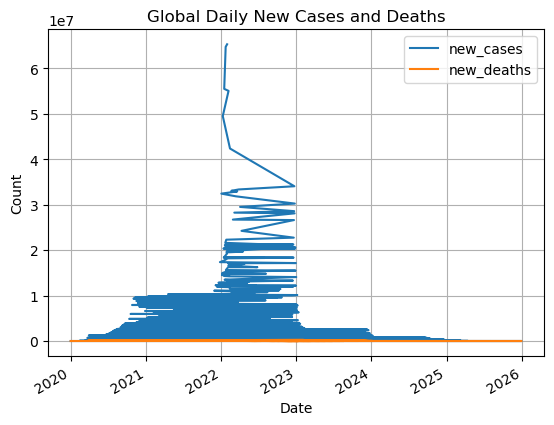

In [57]:
plt.figure(figsize=(14, 6))
Trend.plot(title='Global Daily New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

- In 2020 -2024 there were more new cases recorded than new_death recorded.

## 2.Fatality rate

In [58]:
# Filtering to countries with at least 100 total cases
filtered_data = data_copy[data_copy['total_cases'] >= 100].copy()
filtered_data['case_fatality_rate'] = (filtered_data['total_deaths'] / filtered_data['total_cases']) * 100
rate_by_country = filtered_data.groupby('country')['case_fatality_rate'].max().sort_values(ascending=False)
rate_by_country

country
France                          2515.151515
Mauritania                       113.740458
Democratic Republic of Congo      82.283465
Niger                             55.882353
Yemen                             29.198842
                                   ...     
Nauru                              0.029464
Cook Islands                       0.028506
Falkland Islands                   0.000000
Saint Helena                       0.000000
Niue                               0.000000
Name: case_fatality_rate, Length: 244, dtype: float64

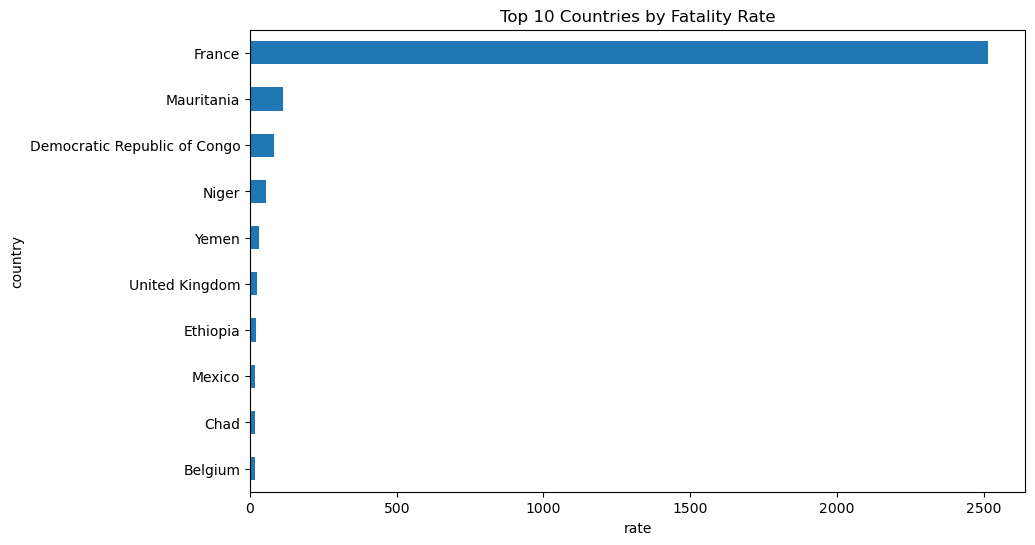

In [59]:
# Top 10 countries
rate_by_country.head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Countries by Fatality Rate')
plt.xlabel('rate')
plt.gca().invert_yaxis()
plt.show()

- France has the highest rate with over 2500 
- Other countries have small fatality rates, making France an extreme outlier in the dataset.

## 3.Total vaccinations per country

In [60]:
vacc_by_country = data_copy.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False)
vacc_by_country.head(n=10)

country
Cuba            415.88333
Gibraltar       353.31204
Japan           346.69210
Chile           341.96774
Taiwan          291.02835
Brunei          283.99432
Hong Kong       281.44638
Guernsey        280.26782
Cambodia        278.03503
Cook Islands    277.80500
Name: total_vaccinations_per_hundred, dtype: float64

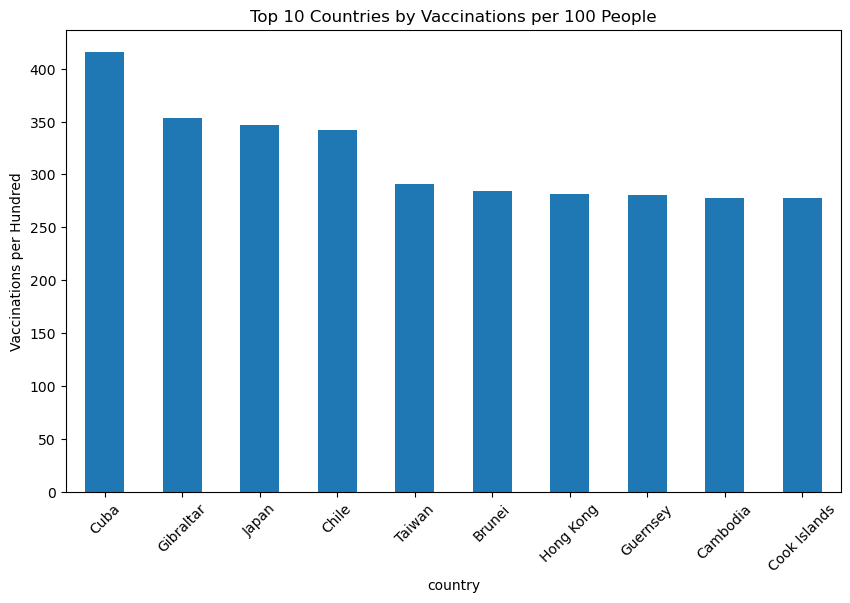

In [61]:
vacc_by_country.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Vaccinations per 100 People')
plt.ylabel('Vaccinations per Hundred')
plt.xticks(rotation=45)
plt.show()

- None of the countries with the highest fatality rates (France, Mauritania, etc.) appear in the top 10 for vaccination coverage.
- Cuba leads with over 400 vaccinations per 100 people, which implies multiple doses per person

## 4.Correlation Between Vaccination and Cases

In [64]:
# Take most recent data per country
latest = data_copy.sort_values('date').groupby('country').tail(1)

# Correlation
corr = latest[['total_vaccinations_per_hundred', 'total_cases']].corr()
corr

,total_vaccinations_per_hundred,total_cases
total_vaccinations_per_hundred,1.000000,-0.012235
total_cases,-0.012235,1.000000


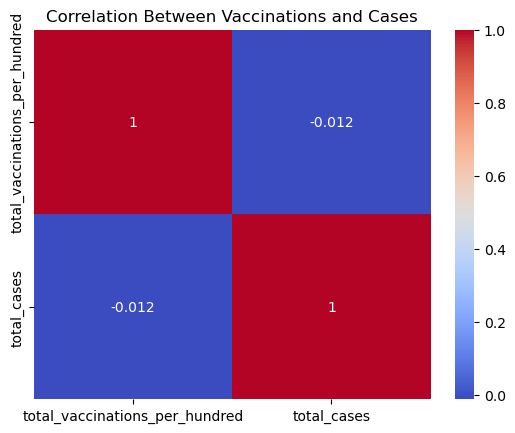

In [65]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Vaccinations and Cases')
plt.show()

- A correlation coefficient close to 0 (here, -0.012) means there is no significant linear relationship between the number of total vaccinations per 100 people and the total number of COVID-19 cases.
- This indicates that vaccination coverage does not correlate with reported cases.

## 5.Cases over time

In [72]:
top_countries = data_copy.groupby('country')['total_cases'].max().sort_values(ascending=False).head(5)
top_countries

country
World                                                  777656206.0
World excl. China                                      678274445.0
World excl. China and South Korea                      643702572.0
World excl. China, South Korea, Japan and Singapore    606892845.0
High-income countries                                  429967455.0
Name: total_cases, dtype: float64

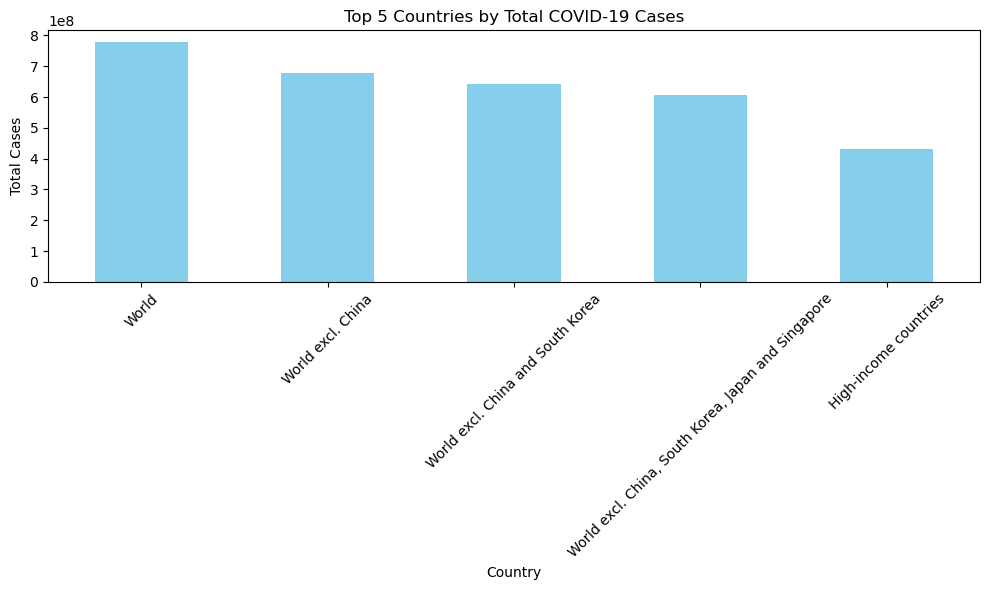

In [76]:
# Assuming top_countries is already defined
top_countries = data_copy.groupby('country')['total_cases'].max().sort_values(ascending=False).head(5)
# Plotting
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- World leads with the highest total cases with around 777 million cases since its all cases globally.


## 6. Pie Chart of Case Distribution by Continent

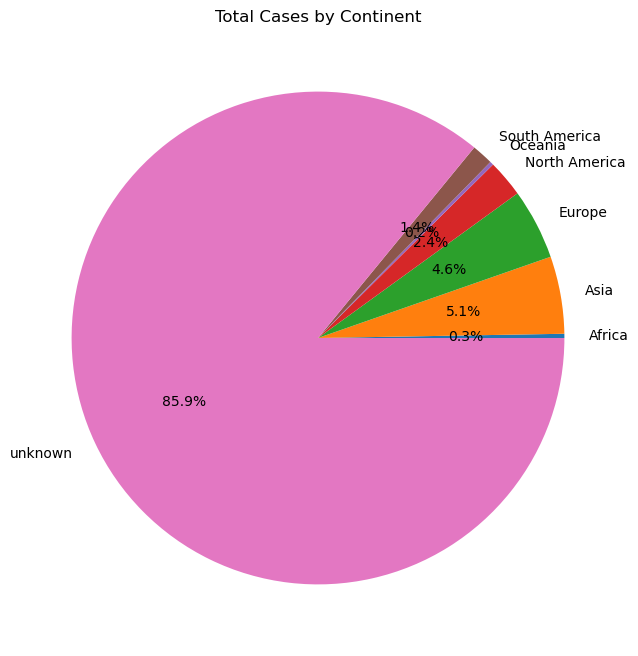

In [77]:
continent_cases = data_copy.groupby('continent')['total_cases'].sum()
continent_cases.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Total Cases by Continent')
plt.ylabel('')
plt.show()


- A very large portion of the data falls under "unknown" for the continent field.This suggests that continent information is missing .

## 7. checking the relationships between variables.

<Axes: >

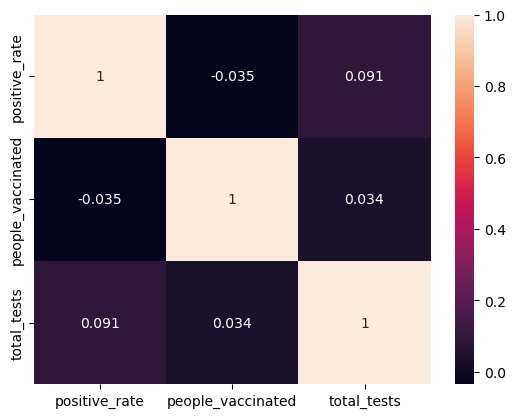

In [80]:
correlation = data_copy[['positive_rate','people_vaccinated','total_tests']].corr()
sns.heatmap(correlation, annot=True)


- There's a very weak negative correlation, indicating almost no linear relationship.
- There's no meaningful linear relationship between the number of tests and vaccinations in this dataset.e.g 0.034 indicates a very weak positive correlation. 